In [1]:
import pandas as pd
import string as st
import matplotlib
import numpy as np
import scipy as sp
import os
from sklearn import decomposition, metrics, cluster

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Enter the 'year', i.e. '2000', '2007', or '2014', of citation data that you want to look at
def make_JMatrix(year):
    #Create list of Journal file names
    Jlist = os.listdir('../data/Cogs_'+year+'/Cited_'+year)
    if '.DS_Store' in Jlist:
        Jlist.remove('.DS_Store')
    Jlist.sort()

    jj=''.join(Jlist)
    Jabbr=jj.split(".csv")
    Jabbr=Jabbr[:-1] #for some reason the loop can't run bc there is some '' blank entry in the list

    #Creates Dictionary for mapping file name to file abbreviation
    JDict_map=dict(zip(Jabbr, Jlist))
    df_names=Jlist
    JMatrix=pd.DataFrame(data=np.zeros((len(Jlist),len(Jlist))), index=df_names, columns= df_names)

    data_folder = '../data/Cogs_'+year+'/Cited_'+year+'/'
    for i, Ji in enumerate(Jlist):
        print(i, Ji)
        file = open(data_folder+Jlist[i],'r')
        data = pd.read_csv(file)[:-2]    
        for j, Jj in enumerate(Jlist):
            #j_abbr = Jj.split('.csv')[0]
            num_j_cited_i_row = data[data['Unnamed: 2']==Jabbr[j]]['Unnamed: 3']
            try:
                num_j_cited_i = int(num_j_cited_i_row)
            except:
                num_j_cited_i = 0        

            JMatrix[Jlist[i]][JDict_map[Jabbr[j]]] = num_j_cited_i

    # each column is the incoming citations INTO that journal (at col j)
    # i.e. A_ij is # of times journal i cites journal j
        
    # Looking at the parent journal cognitive sci the which is at the top of this graph,
    # the journals on the left are citing the journals at the top x number of times from 2007 and all prev years
    # THE DATABASE, JCReport, calls these "Citation Values"

    plt.figure(figsize=(10,10))
    plt.imshow(np.log(JMatrix))
    plt.title(year)
    if np.any(JMatrix.sum(axis=0)==0):
        print('Empty Columns:')
        print(np.where(JMatrix.sum(axis=0)==0))
    if np.any(JMatrix.sum(axis=1)==0):
        print('Empty Rows:')
        print(np.where(JMatrix.sum(axis=1)==0))
    if np.any(np.diagonal(JMatrix)==0):
        print('Empty Diagonal:')
        print(np.where(np.diagonal(JMatrix)==0))
    
    return JMatrix

---Year:2000----
0 ACAD MED.csv
1 ADV CHILD DEV BEHAV.csv
2 AM J PRIMATOL.csv
3 AM J PSYCHOL.csv
4 AM PSYCHOL.csv
5 ANIM BEHAV.csv
6 ARTIF INTELL REV.csv
7 ARTIF INTELL.csv
8 BEHAV BRAIN SCI.csv
9 BEHAV PROCESS.csv
10 BEHAVIOUR.csv
11 BRIT J PSYCHOL.csv
12 CHILD DEV.csv
13 COGNITION INSTRUCT.csv
14 COGNITION.csv
15 COGNITIVE PSYCHOL.csv
16 COGNITIVE SCI.csv
17 COMPUT INTELL.csv
18 CONNECT SCI.csv
19 CONTEMP EDUC PSYCHOL.csv
20 DEV PSYCHOL.csv
21 DEV REV.csv
22 EUR J COGN PSYCHOL.csv
23 EXPERT SYST.csv
24 HUM FACTORS.csv
25 INT J HUM-COMPUT ST.csv
26 INT J PRIMATOL.csv
27 INT J SCI EDUC.csv
28 J AM SOC INFORM SCI.csv
29 J APPL DEV PSYCHOL.csv
30 J CHILD LANG.csv
31 J COMP PSYCHOL.csv
32 J COMPUT ASSIST LEAR.csv
33 J EDUC PSYCHOL.csv
34 J EXP PSYCHOL ANIM B.csv
35 J EXP PSYCHOL GEN.csv
36 J EXP PSYCHOL LEARN.csv
37 J HUM EVOL.csv
38 J LEARN SCI.csv
39 J MEM LANG.csv
40 J PERS SOC PSYCHOL.csv
41 J PRAGMATICS.csv
42 J PSYCHOLINGUIST RES.csv
43 J RES SCI TEACH.csv
44 LANG COGNITIVE PROC.csv

/Users/rdgao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


 BEHAV BRAIN SCI.csv
3 BEHAV RES METHODS.csv
4 BRAIN LANG.csv
5 BRAIN RES.csv
6 BRIT J PSYCHOL.csv
7 CEREB CORTEX.csv
8 COGN LINGUIST.csv
9 COGN SYST RES.csv
10 COGNITION.csv
11 COGNITIVE PSYCHOL.csv
12 COGNITIVE SCI.csv
13 COMPUT EDUC.csv
14 COMPUT HUM BEHAV.csv
15 CONTEMP EDUC PSYCHOL.csv
16 DEV PSYCHOL.csv
17 DEVELOPMENTAL SCI.csv
18 EDUC PSYCHOL REV.csv
19 ETR&D-EDUC TECH RES.csv
20 INT J HUM-COMPUT ST.csv
21 INT J SCI EDUC.csv
22 INTERACT STUD.csv
23 J CHILD LANG.csv
24 J COGNITIVE NEUROSCI.csv
25 J EDUC PSYCHOL.csv
26 J ENG EDUC.csv
27 J EXP PSYCHOL GEN.csv
28 J EXP PSYCHOL HUMAN.csv
29 J EXP PSYCHOL LEARN.csv
30 J LEARN SCI.csv
31 J MEM LANG.csv
32 J PERS SOC PSYCHOL.csv
33 LANG COGNITIVE PROC.csv
34 LEARN INSTR.csv
35 LECT NOTES ARTIF INT.csv
36 LECT NOTES COMPUT SC.csv
37 MED EDUC.csv
38 MEM COGNITION.csv
39 MIND MACH.csv
40 NATURE.csv
41 NEUROCOMPUTING.csv
42 P NATL ACAD SCI USA.csv
43 PHILOS T R SOC B.csv
44 PSYCHOL BULL.csv
45 PSYCHOL LEARN MOTIV.csv
46 PSYCHOL REV.csv
47 P

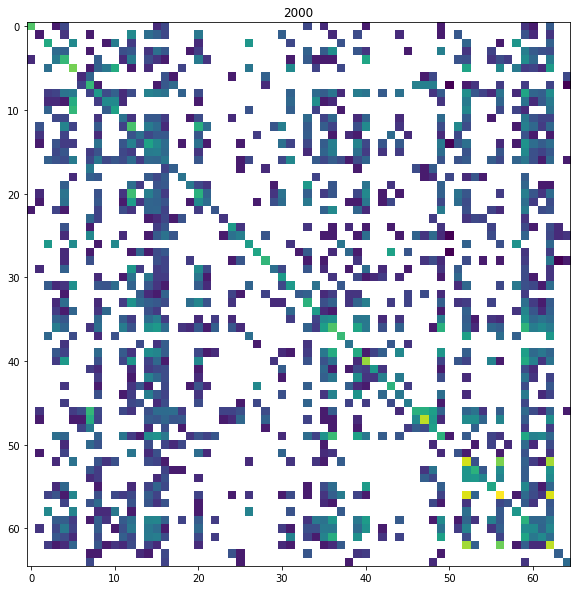

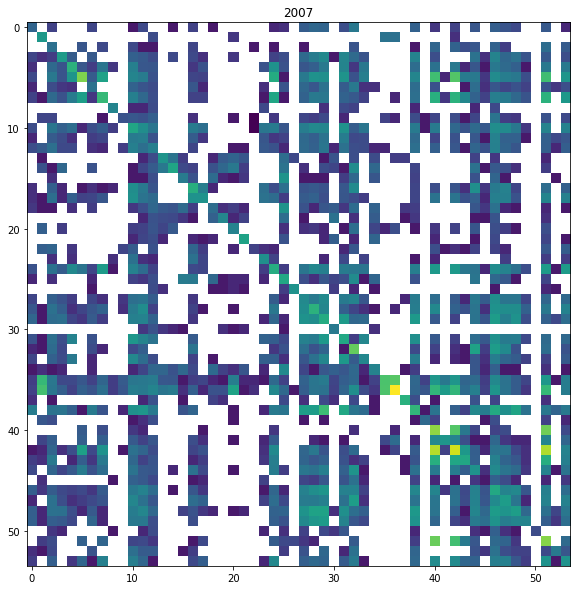

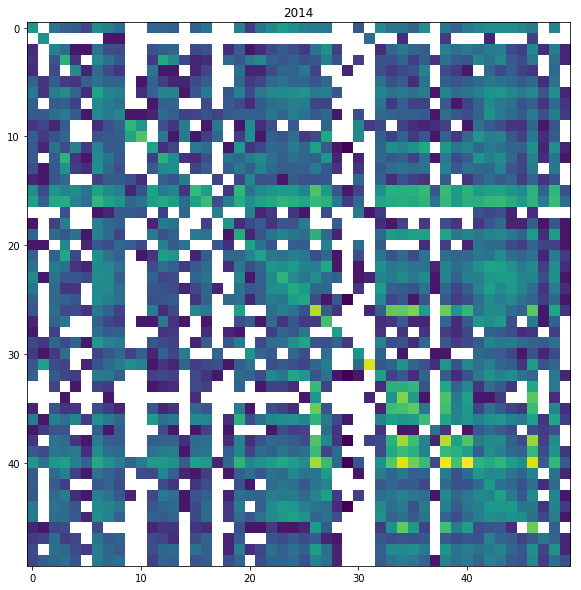

In [15]:
# run for all 3 years and save out
for year in ['2000', '2007', '2014']:
    print('---Year:'+year+'----')
    JMatrix = make_JMatrix(year)
    JMatrix.to_csv('../data/citationMatrices/'+year+'.csv')

# Decomposition & Visualization in 2D
### Outstanding questions/analysis choices:
- which way should the matrix stand (citing or cited as features)
- what distance measure to use for decomposition/clustering (pearson, cosine, etc)
- what clustering method to use (kmeans, spectralclustering, etc)
- how many clusters to have and how to determine cluster membership

COGNITIVE SCI


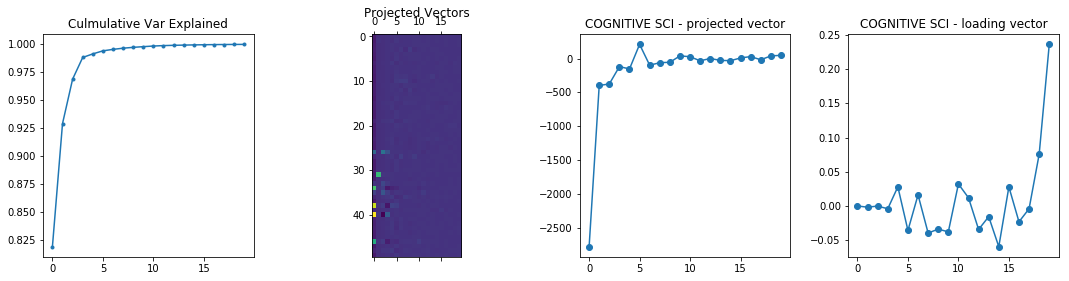

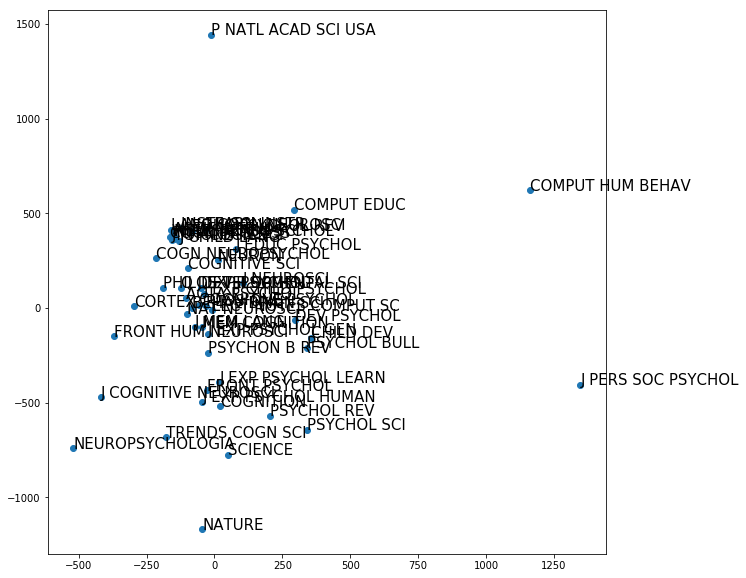

In [43]:
year = '2014'
JMatrix = pd.read_csv('../data/citationMatrices/'+year+'.csv', index_col=0)
jlist = [j.split('.')[0] for j in JMatrix.index]

# from vdB: the columns are the citing variables (journals) so the analysis 
#    represents the citing activity, not the being cited (A_ij is j citing i)
#    whether to transpose the matrix: raw is j citing i, transposed is i citing j
JM_features = JMatrix.as_matrix().T

# SVD and PCA gives essentially the same answer, as it should, with rotational indeterminancy
#citation_svd = decomposition.TruncatedSVD(n_components=20)
citation_svd = decomposition.PCA(n_components=20, whiten=False)

# apply matrix factorization to citation matrix
JMatrix_reduced = citation_svd.fit_transform(JM_features)

# how many components required to capture 95% variance?
#np.where(np.cumsum(citation_svd.explained_variance_ratio_)>=0.95)[0][0]

# cog sci is element 9
ctr_j=8
print(jlist[ctr_j])
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
plt.plot(np.cumsum(citation_svd.explained_variance_ratio_),'.-')
plt.title('Culmulative Var Explained')
plt.subplot(1,4,2)
plt.matshow(JMatrix_reduced, fignum=False)
plt.title('Projected Vectors')
plt.subplot(1,4,3)
# Cogsci's projected/reduced vector
plt.plot(JMatrix_reduced[ctr_j,:],'-o')
plt.title(jlist[ctr_j]+' - projected vector')
# Cogsci's component weights
plt.subplot(1,4,4)
plt.plot(citation_svd.components_[:,ctr_j],'-o');
plt.title(jlist[ctr_j]+' - loading vector')
plt.tight_layout()

plot_dims = [6,5]
plt.figure(figsize=(10,10))
plt.plot(JMatrix_reduced[:,plot_dims[0]],JMatrix_reduced[:,plot_dims[1]],'o')
for i in range(JMatrix_reduced.shape[0]):
    plt.text(JMatrix_reduced[i,plot_dims[0]],JMatrix_reduced[i,plot_dims[1]], jlist[i], fontsize=15)

### vdB method
In van den Besselaar & Heimeriks 2001, they describe the following steps:
1. construct citation matrix, where element A_ij is # of times journal j cites journal i
2. apply PCA on correlation matrix
3. re: how many components to keep, in personal comm., vdB says: "I start with factors with eigenvector > 1. If that gives too many small factors, I try to force less factors. The the best readable favor solution is selected"
4. apply varimax rotation on extracted components, and categorize journals based on strongest (rotated) component


https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/

[6.53006131e+07 8.19928883e+06 2.78776690e+06 1.44875316e+06
 3.34189384e+05 2.04154273e+05 9.78590537e+04 7.75781104e+04
 5.57885606e+04 5.02938223e+04]
[0.82953157 0.93368938 0.96910315 0.98750705 0.99175235 0.99434578
 0.99558891 0.99657441 0.9972831  0.997922  ]


,0,1,2,3,4,5,6,7,8,9
0,NATURE,ARTIF INTELL,J NEUROSCI,PLOS ONE,ACTA PSYCHOL,P NATL ACAD SCI USA,COMPUT EDUC,COGN NEUROPSYCHOL,CHILD DEV,J PERS SOC PSYCHOL
1,SCIENCE,LECT NOTES COMPUT SC,NAT NEUROSCI,None,BEHAV BRAIN SCI,None,COMPUT HUM BEHAV,COGN PROCESS,DEV PSYCHOL,PSYCHOL BULL
2,None,None,NEURON,None,COGNITION,None,EDUC PSYCHOL REV,CORTEX,DEVELOPMENTAL SCI,None
3,None,None,None,None,COGNITIVE PSYCHOL,None,INSTR SCI,FRONT HUM NEUROSCI,J CHILD LANG,None
4,None,None,None,None,COGNITIVE SCI,None,LEARN INSTR,J COGNITIVE NEUROSCI,J EDUC PSYCHOL,None
5,None,None,None,None,FRONT PSYCHOL,None,None,NEUROPSYCHOLOGIA,J EXP CHILD PSYCHOL,None
6,None,None,None,None,J EXP PSYCHOL GEN,None,None,PHILOS T R SOC B,None,None
7,None,None,None,None,J EXP PSYCHOL HUMAN,None,None,TRENDS COGN SCI,None,None
8,None,None,None,None,J EXP PSYCHOL LEARN,None,None,None,None,None
9,None,None,None,None,J MEM LANG,None,None,None,None,None


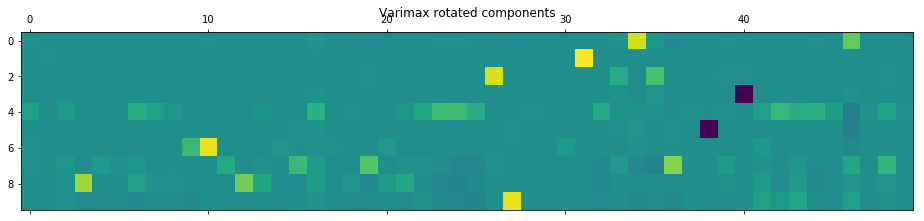

In [86]:
import factor_rotation as fr
# https://github.com/mvds314/factor_rotation
N_comp = 10
year = '2014'
JMatrix = pd.read_csv('../data/citationMatrices/'+year+'.csv', index_col=0)
jlist = [j.split('.')[0] for j in JMatrix.index]

# from vdB: the columns are the citing variables (journals) so the analysis 
#    represents the citing activity, not the being cited (A_ij is j citing i)
#    whether to transpose the matrix: raw is j citing i, transposed is i citing j
JM_features = JMatrix.as_matrix()
citation_pca = decomposition.PCA(n_components=N_comp, whiten=False)

# apply matrix factorization to citation matrix
JMatrix_reduced = citation_pca.fit_transform(JM_features)

# apply varimax rotation to components
L, T = fr.rotate_factors(citation_pca.components_.T,'varimax')
print(citation_pca.explained_variance_)
print(np.cumsum(citation_pca.explained_variance_ratio_))

plt.figure(figsize=(15,4))
plt.matshow(L.T)
plt.title('Varimax rotated components')

# categorize journals by component
j_list_cat = [[] for n in range(N_comp)]
# here, I use absolute component strength, instead of raw strength
#    which seems to deal with rotational indeterminancy of the components
for idx,cat in enumerate(np.argmax(np.abs(L),axis=1)):
    j_list_cat[cat].append(jlist[idx])

j_cat_table = pd.DataFrame(j_list_cat).T
j_cat_table
#j_cat_table.to_csv('../data/Cogs_'+year+'/'+year+'_component_categorized.csv')

# k-Means & Spectral Clustering

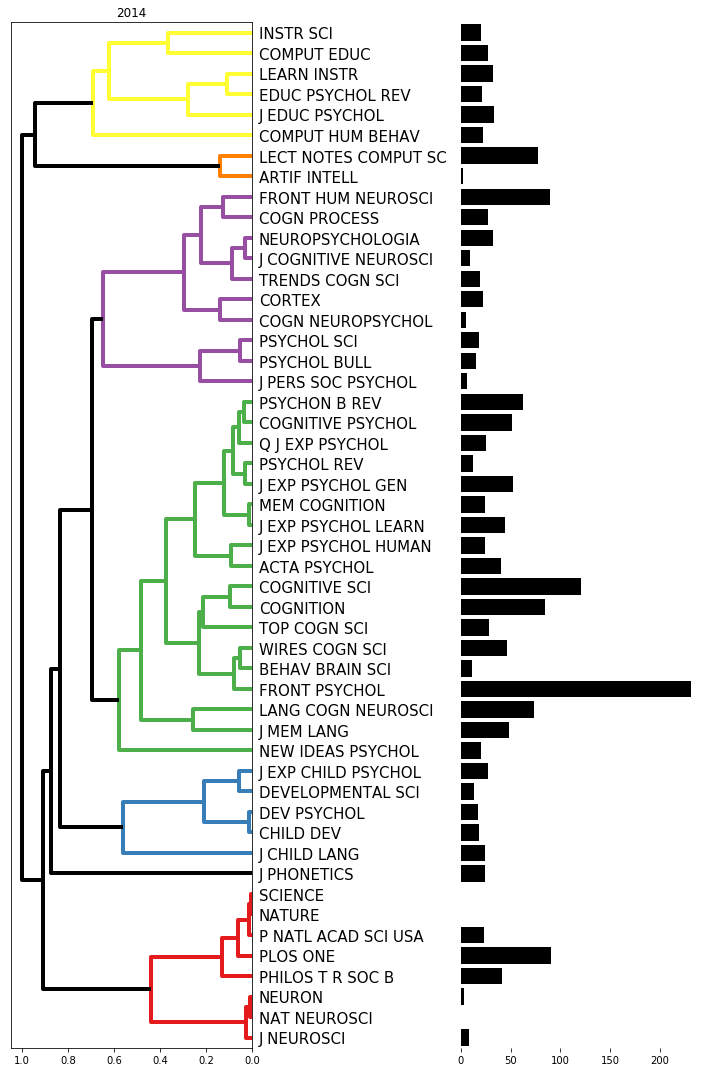

In [192]:
import scipy.cluster
clist = [matplotlib.colors.rgb2hex(plt.cm.get_cmap('Set1')(i)) for i in range(6)] #tab10, Set1
sp.cluster.hierarchy.set_link_color_palette(clist)
matplotlib.rcParams['lines.linewidth'] = 4

n_clusters = 8
apply_heat = False
method = 'hierarchical'

if method is 'kmeans':
    clu = cluster.KMeans(n_clusters=n_clusters) # kmeans
    clu.fit(JMatrix_reduced)

elif method is 'spectral':
    J_sim = metrics.pairwise.cosine_similarity(JM_features)
    if apply_heat:
        beta=0.01 # parameter for heat kernel
        J_dist = 1-J_sim
        J_sim = np.exp(-(beta*J_dist/J_dist.std()))
    #    similarity = np.exp(-beta * distance / distance.std())
    
    plt.figure(figsize=(6,8))
    plt.matshow(J_sim, fignum=False)
    plt.colorbar()
    plt.title('Affinity Matrix')
    clu = cluster.SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans') # spectral clustering
    clu.fit(J_sim)

elif method is 'hierarchical':
#     clu = cluster.hierarchical.AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='complete')
#     clu.fit_predict(JM_features)
    Y = sp.cluster.hierarchy.linkage(JM_features, method='complete', metric='cosine')
    plt.figure(figsize=(10,15))
    plt.subplot(1,2,1)
    Z = sp.cluster.hierarchy.dendrogram(Y,orientation='left',labels=jlist,color_threshold=0.69,leaf_font_size=15,above_threshold_color='k')
    plt.title(year)
    
    plt.subplot(1,2,2)
    plt.barh(range(len(jlist)), JM_features[8,Z['leaves']], color='k') # cites cogsci
    plt.ylim([0-0.5,len(jlist)-0.5])
    plt.yticks([])

    # label by ranking
#     top_ticks = [np.where(Z['leaves']==np.argsort(JM_features[8,:])[-i])[0][0] for i in range(1,21)]
#     plt.yticks(top_ticks[0:10], np.arange(0,10)+1, fontsize=18, color=clist[0])
#     for i in range(10,20):
#         plt.text(-4,top_ticks[i]-0.1,str(i+1), fontsize=18, horizontalalignment='right', verticalalignment='center', color=clist[1])

    plt.box('off')
    plt.tight_layout()
    plt.savefig('../figures/dendrogram_adv/'+year, )
    
# clu_label = clu.labels_
# clu_inds = np.argsort(clu_label)
# clustered_J = [[jlist[i] for i in np.where(clu_label==query_clu)[0]] for query_clu in range(n_clusters)]
# pd.DataFrame([t for t in clustered_J], index=['Clu%i'%i for i in range(n_clusters)]).T

In [132]:
top_j = np.argsort(JM_features[8,:])[:-20:-1]
top_ticks = [np.where(Z['leaves']==np.argsort(JM_features[8,:])[-i])[0][0] for i in range(1,20)]

[17, 22, 4, 41, 21, 43, 16, 31, 27, 30, 15, 19, 25, 3, 23, 45, 47, 39, 20]

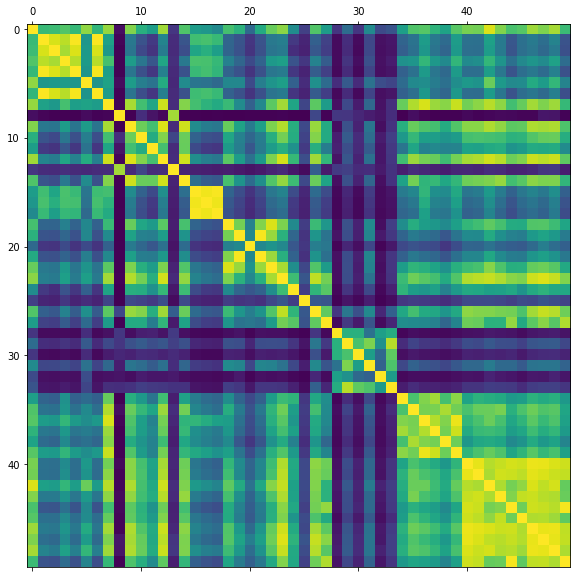

In [23]:
plt.figure(figsize=(10,10))
plt.matshow(J_sim[clu_inds][:,clu_inds], fignum=False)

# Notes to do:
- plot cogsci-to-X distance and section based on clustering
- decide on # of cluster based on some sensible criteria
- do hierarchical clustering & dendrogram

In [ ]:
2000 cited = 1194
2000 citing = 1457   4 issues a year

2007 cited = 2093
2007 citing = 2031   6 issues a year

2014 cited = 3916
2014 citing = 4092   8 issues a year